# Basis: Tensor Operations

This notebook shows how to create and operate on vectors, matrices, and tensors using PixelPrism's public helpers.


In [1]:
import numpy as np
import pixelprism.inspect as pinspect
from pixelprism.math import utils, DType, MathNode
from pixelprism.math.functional import elementwise as F
from pixelprism.math.render import render_latex
from pixelprism.math.functional import trigo as T
from pixelprism.math.functional import linear_algebra as LA
from pixelprism.math.functional import reduction as R
from pixelprism.math.functional.helpers import apply_operator


## Creation utilities

Use the utility constructors for scalars, vectors, matrices, and higher-rank tensors.


In [2]:
scalar = utils.scalar(name="scalar", value=3.0, dtype=DType.FLOAT32)
vector = utils.vector(name="vector", value=[1.0, 2.0, 3.0], dtype=DType.FLOAT32)
matrix = utils.matrix(name="matrix", value=[[1.0, 2.0], [3.0, 4.0]], dtype=DType.FLOAT32)
tensor3d = utils.tensor(name="tensor3d", data=[[[1.0, 2.0], [3.0, 4.0]]], dtype=DType.FLOAT32)

print(scalar)
print(vector)
print(matrix)
print(tensor3d)


tensor(scalar, 3.0, dtype=DType.FLOAT32, shape=())
tensor(vector, [1.0, 2.0, 3.0], dtype=DType.FLOAT32, shape=(3,))
tensor(matrix, [[1.0, 2.0], [3.0, 4.0]], dtype=DType.FLOAT32, shape=(2, 2))
tensor(tensor3d, [[[1.0, 2.0], [3.0, 4.0]]], dtype=DType.FLOAT32, shape=(1, 2, 2))


## Convenience constructors

You can also allocate common tensor shapes directly.


In [3]:
zeros = utils.zeros(name="zeros", shape=(2, 2), dtype=DType.FLOAT32)
ones = utils.ones(name="ones", shape=(2, 2), dtype=DType.FLOAT32)
full = utils.full(name="full", shape=(2, 2), value=5.0, dtype=DType.FLOAT32)
identity = utils.eye_like(name="identity", x=zeros)

print(zeros)
print(ones)
print(full)
print(identity)


tensor(zeros, [[0.0, 0.0], [0.0, 0.0]], dtype=DType.FLOAT32, shape=(2, 2))
tensor(ones, [[1.0, 1.0], [1.0, 1.0]], dtype=DType.FLOAT32, shape=(2, 2))
tensor(full, [[5.0, 5.0], [5.0, 5.0]], dtype=DType.FLOAT32, shape=(2, 2))
tensor(identity, [[1.0, 0.0], [0.0, 1.0]], dtype=DType.FLOAT32, shape=(2, 2))


## Operators

We can combine tensors with scalars and with tensors of the same shape using the arithmetic operators.


In [4]:
tensor_a = utils.vector(name="\mathbf{T}", value=[1.0, 2.0, 3.0], dtype=DType.FLOAT32)
tensor_b = utils.vector(name="\mathbf{X}", value=[4.0, 5.0, 6.0], dtype=DType.FLOAT32)
scalar_two = utils.scalar(name="two", value=2.0, dtype=DType.FLOAT32, mutable=False)

ops = {
    "tensor + scalar": MathNode.add(tensor_a, scalar_two),
    "tensor - scalar": MathNode.sub(tensor_a, scalar_two),
    "tensor * scalar": MathNode.mul(tensor_a, scalar_two),
    "tensor / scalar": MathNode.div(tensor_a, scalar_two),
    "-tensor": MathNode.neg(tensor_a),
    "tensor + tensor": MathNode.add(tensor_a, tensor_b),
    "tensor - tensor": MathNode.sub(tensor_a, tensor_b),
    "tensor * tensor": MathNode.mul(tensor_a, tensor_b),
    "tensor / tensor": MathNode.div(tensor_a, tensor_b),
}

for label, expr in ops.items():
    print(f"{label}: {expr} -> {expr.eval()}")


tensor + scalar: <MathExpr #11 add float32 (3,) c:2> -> [3. 4. 5.]
tensor - scalar: <MathExpr #12 sub float32 (3,) c:2> -> [-1.  0.  1.]
tensor * scalar: <MathExpr #13 mul float32 (3,) c:2> -> [2. 4. 6.]
tensor / scalar: <MathExpr #14 div float32 (3,) c:2> -> [0.5 1.  1.5]
-tensor: <MathExpr #15 neg float32 (3,) c:1> -> [-1. -2. -3.]
tensor + tensor: <MathExpr #16 add float32 (3,) c:2> -> [5. 7. 9.]
tensor - tensor: <MathExpr #17 sub float32 (3,) c:2> -> [-3. -3. -3.]
tensor * tensor: <MathExpr #18 mul float32 (3,) c:2> -> [ 4. 10. 18.]
tensor / tensor: <MathExpr #19 div float32 (3,) c:2> -> [0.25 0.4  0.5 ]


## Functional API

You can also use the functional arithmetic helpers.


In [5]:
functional_ops = {
    "add": F.add(tensor_a, tensor_b),
    "sub": F.sub(tensor_a, tensor_b),
    "mul": F.mul(tensor_a, tensor_b),
    "div": F.div(tensor_a, tensor_b),
    "neg": F.neg(tensor_a),
}

for label, expr in functional_ops.items():
    print(f"{label}: {expr.eval()}")


add: [5. 7. 9.]
sub: [-3. -3. -3.]
mul: [ 4. 10. 18.]
div: [0.25 0.4  0.5 ]
neg: [-1. -2. -3.]


## Visualize a computation

Inspect the computation graph and render its LaTeX form.


In [6]:
expr = MathNode.div(MathNode.add(tensor_a, tensor_b), scalar_two)

tree_viz = pinspect.inspect(expr, backend="graphviz")
tree_viz

latex_image = render_latex(expr, output_path="basis_tensor_expr.svg")
latex_image

print("Expression evaluation:", expr.eval())


This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=28.916496pt, height=20.485703pt, depth=0pt
  graphic size: 28.916496pt x 20.485687pt (10.162986mm x 7.199896mm)
  output written to basis_tensor_expr.svg
1 of 1 page converted in 0.102485 seconds


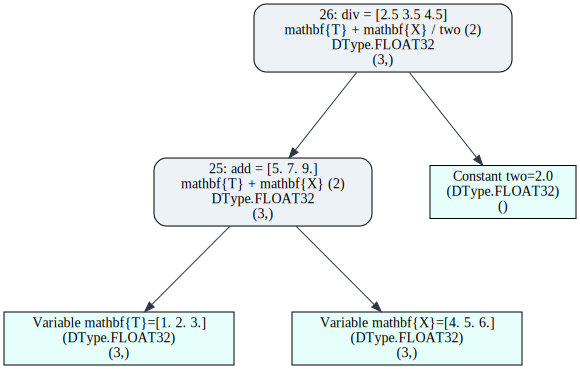

In [7]:
tree_viz

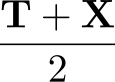

In [8]:
latex_image

## Advanced tensor operators: pow, exp, and trig

Element-wise power/exponential operators compose seamlessly with the trigonometric
helpers. Below we construct a richer tensor graph and preview both the tree and
its LaTeX rendering.

In [9]:
tensor_two = utils.scalar(name="two", value=2.0, dtype=DType.FLOAT32, mutable=False)

tensor_pow = F.pow(tensor_a, tensor_two)
tensor_exp = F.exp(tensor_b)
tensor_sin = T.sin(tensor_a)
tensor_cos = T.cos(tensor_b)

tensor_trig_expr = MathNode.add(
    tensor_pow,
    MathNode.mul(tensor_exp, tensor_sin)
)

print("Tensor trig evaluation:\n", tensor_trig_expr.eval())

Tensor trig evaluation:
 [ 46.94276 138.9517   65.93187]


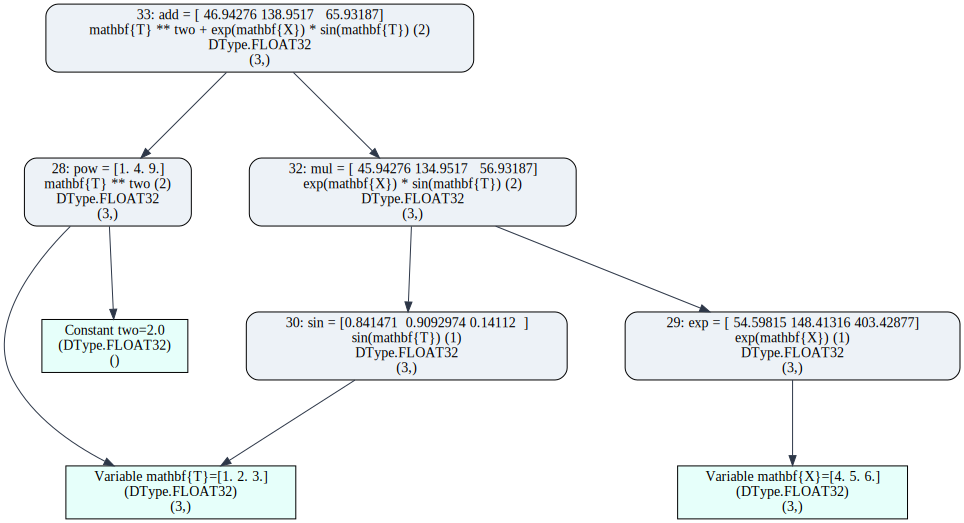

In [10]:
tensor_trig_tree = pinspect.inspect(tensor_trig_expr, backend="graphviz")
tensor_trig_tree

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=95.069174pt, height=11.140033pt, depth=0pt
  graphic size: 95.069174pt x 11.140033pt (33.412993mm x 3.915274mm)
  output written to tensor_trig_expr.svg
1 of 1 page converted in 0.0980039 seconds


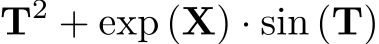

In [11]:
tensor_trig_latex = render_latex(tensor_trig_expr, output_path="tensor_trig_expr.svg")
tensor_trig_latex

## Reduction operators

Reduction helpers collapse an entire tensor down to a scalar so you can summarize a composite value before feeding it into downstream expressions. PixelPrism exposes a `reduction` module with helpers such as `sum`, `mean`, and `std`, each of which keeps track of the computation graph and can be rendered like any other math expression.


In [12]:
reduction_tensor = utils.matrix(
    name="R",
    value=[[1.0, 2.0, 3.0], [4.0, -1.0, 0.5]],
    dtype=DType.FLOAT32,
    mutable=True,
)
print("Reduction tensor:", reduction_tensor.eval())


Reduction tensor: [[ 1.   2.   3. ]
 [ 4.  -1.   0.5]]


### Sum

`R.sum` collapses every element of `\mathbf{R}` via repeated addition. The resulting scalar is useful for computing totals or normalizing other tensors; the inspected tree highlights how each input flows into the single scalar output.


In [13]:
sum_expr = R.sum(reduction_tensor)
print("Sum evaluation:", sum_expr.eval())


Sum evaluation: 9.5


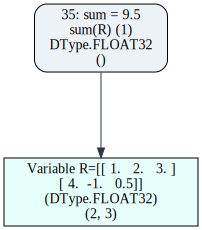

In [14]:
sum_tree = pinspect.inspect(sum_expr, backend="graphviz")
sum_tree


This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

ERROR: can't open file 'tmp_latex/equation.dvi' for reading


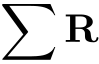

In [15]:
sum_latex = render_latex(sum_expr, output_path="tensor_sum_expr.svg")
sum_latex


### Mean

`R.mean` divides the sum of all entries by the number of elements, giving the average value encoded inside the tensor. This reduction is common when centering batches before applying dot or matmul operations.


In [16]:
mean_expr = R.mean(reduction_tensor)
print("Mean evaluation:", mean_expr.eval())


Mean evaluation: 1.5833334


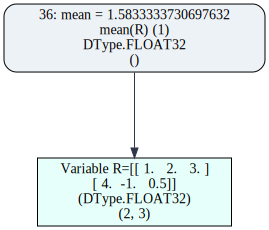

In [17]:
mean_tree = pinspect.inspect(mean_expr, backend="graphviz")
mean_tree


This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=38.781347pt, height=10pt, depth=0pt
  graphic size: 38.781347pt x 10pt (13.630085mm x 3.514598mm)
  output written to tensor_mean_expr.svg
1 of 1 page converted in 0.096041 seconds


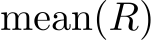

In [18]:
mean_latex = render_latex(mean_expr, output_path="tensor_mean_expr.svg")
mean_latex


### Standard deviation (std)

`R.std` measures how far the tensor entries deviate from the mean. The resulting scalar describes the spread of the values and is especially helpful when scaling or whitening tensors prior to more advanced pipelines.


In [19]:
std_expr = R.std(reduction_tensor)
print("Standard deviation evaluation:", std_expr.eval())


Standard deviation evaluation: 1.6435903


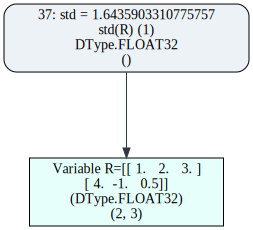

In [20]:
std_tree = pinspect.inspect(std_expr, backend="graphviz")
std_tree


This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=21.520878pt, height=10pt, depth=0pt
  graphic size: 21.520878pt x 10pt (7.563723mm x 3.514598mm)
  output written to tensor_std_expr.svg
1 of 1 page converted in 0.0961649 seconds


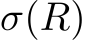

In [21]:
std_latex = render_latex(std_expr, output_path="tensor_std_expr.svg")
std_latex

### Summation operator

The summation operator lets you express "for" loops declaratively. Provide lower and upper integer bounds plus a bounded variable, and PixelPrism repeatedly evaluates the body expression while updating that variable. This mirrors the classical $\sum$ notation and keeps the computation graph intact for inspection and LaTeX rendering.


In [22]:
summation_index = utils.bounded_variable(name="k", shape=(), dtype=DType.INT32)
summation_lower = utils.scalar(name="k_{\min}", value=1, dtype=DType.INT32, mutable=False)
summation_upper = utils.scalar(name="k_{\max}", value=5, dtype=DType.INT32, mutable=False)
summation_offset = utils.scalar(name="k_{\mathrm{offset}}", value=1, dtype=DType.INT32, mutable=False)

summation_body = MathNode.mul(
    summation_index,
    MathNode.add(summation_index, summation_offset),
)

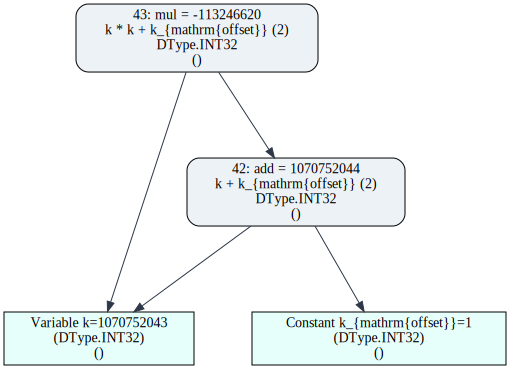

In [23]:
summation_body_tree = pinspect.inspect(summation_body, backend="graphviz")
summation_body_tree

In [24]:
summation_expr = R.summation(summation_body, lower=summation_lower, upper=summation_upper, bounded_variable=summation_index)
print("Summation evaluation:", summation_expr.eval())

Summation evaluation: 70


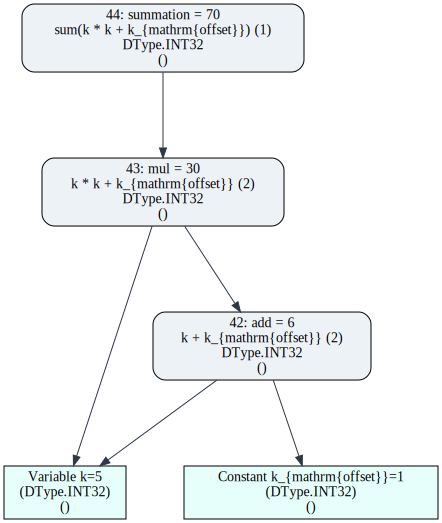

In [25]:
summation_tree = pinspect.inspect(summation_expr, backend="graphviz")
summation_tree

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=67.253407pt, height=30.038974pt, depth=0pt
  graphic size: 67.253407pt x 29.038974pt (23.636869mm x 10.206032mm)
  output written to tensor_summation_expr.svg
1 of 1 page converted in 0.0984261 seconds


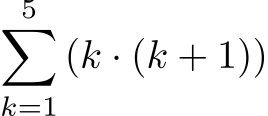

In [26]:
summation_latex = render_latex(summation_expr, output_path="tensor_summation_expr.svg")
summation_latex

## Linear Algebra

### Dot operator

The dot product collapses two tensors of the same length into a scalar by multiplying
matching entries and summing the products. PixelPrism exposes this as the `dot` operator,
which is ideal for measuring how aligned two vectors are and for building projection steps
in larger expressions. The snippet below reuses `\mathbf{T}` and `\mathbf{X}` from the
previous section, inspects the resulting computation tree, and renders its LaTeX form.

In [27]:
vec_a = utils.vector(name="\mathbf{a}", value=[1.0, 2.0, 3.0], dtype=DType.FLOAT32)
vec_b = utils.vector(name="\mathbf{b}", value=[4.0, 5.0, 6.0], dtype=DType.FLOAT32)
dot_expr = LA.dot(vec_a, vec_b)
print("Dot product evaluation:", dot_expr.eval())

Dot product evaluation: 32.0


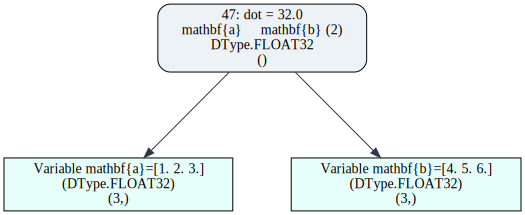

In [28]:
dot_tree = pinspect.inspect(dot_expr, backend="graphviz")
dot_tree

In [29]:
dot_latex = render_latex(dot_expr, output_path="tensor_dot_expr.svg")
dot_latex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=19.201216pt, height=6.944447pt, depth=0pt
  graphic size: 19.201216pt x 6.944447pt (6.748456mm x 2.440694mm)
  output written to tensor_dot_expr.svg
1 of 1 page converted in 0.0953431 seconds


### Outer product operator

Where the dot product collapses two vectors to a scalar, the outer product keeps all
pairwise combinations, yielding a matrix whose rows and columns capture the contributions
of the input tensors. This is exposed through `outer` and is useful for building covariance
matrices or tensor factorizations. Below we build `\mathbf{T} \otimes \mathbf{X}`, inspect the tree,
and render its LaTeX.

In [30]:
outer_expr = LA.outer(vec_a, vec_b)
print("Outer product evaluation:\n", outer_expr.eval())

Outer product evaluation:
 [[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]


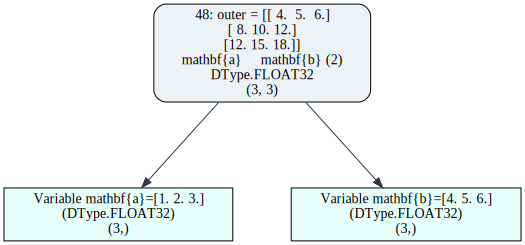

In [31]:
outer_tree = pinspect.inspect(outer_expr, backend="graphviz")
outer_tree

In [32]:
outer_latex = render_latex(outer_expr, output_path="tensor_outer_expr.svg")
outer_latex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=24.201235pt, height=7.777775pt, depth=.000011pt
  graphic size: 24.201235pt x 7.777786pt (8.505761mm x 2.733579mm)
  output written to tensor_outer_expr.svg
1 of 1 page converted in 0.0960519 seconds


### Trace operator

`LA.trace` focuses on a single matrix by summing its diagonal entries. Unlike dot or matmul, the trace returns a scalar that captures an invariant of the matrix, which makes it handy for monitoring transformations before stacking them into more complex expressions.


In [33]:
trace_matrix = utils.matrix(
    name="\mathbf{T}_{\mathrm{tr}}",
    value=[[1.0, 2.0, -1.0], [0.0, 3.0, 4.0], [2.5, -2.0, 1.0]],
    dtype=DType.FLOAT32,
    mutable=False,
)
trace_expr = LA.trace(trace_matrix)
print("Trace evaluation:", trace_expr.eval())


Trace evaluation: 5.0


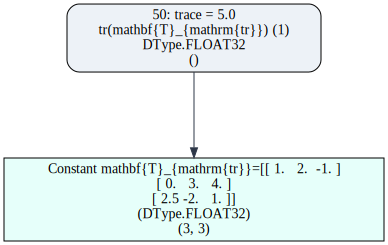

In [34]:
trace_tree = pinspect.inspect(trace_expr, backend="graphviz")
trace_tree


This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=112.527967pt, height=36.000347pt, depth=.000004pt
  graphic size: 112.527967pt x 36.000351pt (39.549057mm x 12.652676mm)
  output written to tensor_trace_expr.svg
1 of 1 page converted in 0.097203 seconds


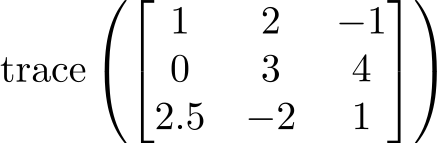

In [35]:
trace_latex = render_latex(trace_expr, output_path="tensor_trace_expr.svg")
trace_latex


### Matrix multiplication operator

PixelPrism exposes a dedicated ``matmul`` operator that respects tensor ranks
and follows NumPy-style broadcasting rules. Below we build a small matrix
multiplication, inspect the resulting expression tree, and render the LaTeX
representation.

In [36]:
mat_left = utils.matrix(name="A", value=[[1.0, 2.0], [3.0, 4.0]], dtype=DType.FLOAT32, mutable=False)
mat_right = utils.matrix(name="B", value=[[5.0, 6.0], [7.0, 8.0]], dtype=DType.FLOAT32, mutable=False)

matmul_expr = LA.matmul(mat_left, mat_right)
print("Matmul evaluation:", matmul_expr.eval())

Matmul evaluation: [[19. 22.]
 [43. 50.]]


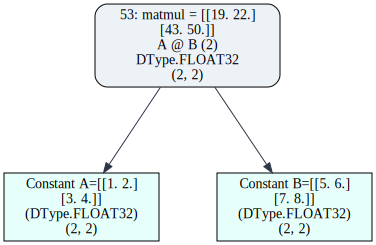

In [37]:
matmul_tree = pinspect.inspect(matmul_expr, backend="graphviz")
matmul_tree

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=73.333412pt, height=24.00024pt, depth=.000004pt
  graphic size: 73.333412pt x 24.000244pt (25.773747mm x 8.435121mm)
  output written to tensor_matmul_expr.svg
1 of 1 page converted in 0.0972559 seconds


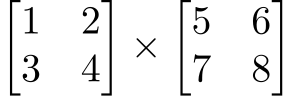

In [38]:
matmul_latex = render_latex(matmul_expr, output_path="tensor_matmul_expr.svg")
matmul_latex